In [1]:
# Testing model on brand new data from 2020

In [64]:
# Imports
import pickle 
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [65]:
#Read in new Data
df = pd.read_csv('./mlb-pitching-2020.csv', index_col='Player')
df.head()
df = df.drop(['Team'], axis=1)
df.head()

,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
Player,,,,,,,,,,,,,,,,,,
Dylan Bundy,27,4,4,1,0,28.2,15,5,35,3,2,3,1,0,0,0,1.57,0.63
Shane Bieber,25,4,4,0,0,27.2,16,5,43,5,4,3,0,0,0,0,1.63,0.76
German Marquez,25,4,4,0,0,26.0,18,6,27,6,2,2,2,0,0,0,2.08,0.92
Kyle Freeland,27,4,4,0,0,25.2,21,7,13,7,4,2,0,0,0,0,2.45,1.09
Sonny Gray,30,4,4,0,0,24.0,14,6,35,8,2,3,1,0,0,0,2.25,0.92


In [66]:
# List of Features that will help test the model
features = ['GS', 'IP', 'H', 'ER', 'K', 'BB', 'HR', 'L']

c = df.corr()
selected_features = []
for i in range(len(c['W'])):
  if c['W'].values[i] >= 0.5 and c['W'].values[i] != 1.0:
    selected_features.append(c['W'].index[i])
  
selected_features

['IP', 'K']

In [67]:
X = df[features]
y = df.W

In [68]:
X.head()

#This is a single test from 2016 stats - Justin Verlander
fake_test = pd.DataFrame({
    'GS':34,
    'IP':223.0,
    'H':137,
    'ER':64,
    'K':300,
    'BB':42,
    'HR':36,
    'L':6
}, index=[0])
fake_test.head()

,GS,IP,H,ER,K,BB,HR,L
0,34,223.0,137,64,300,42,36,6


In [69]:
# Load in Model
loaded_model = pickle.load(open('./rf_pitching_model.sav', 'rb'))

In [70]:
#Making predictions
y_pred = loaded_model.predict(X)

# Quick Predictions to see if our model is any good because the 2020 data is very sparse at the moment
fake_pred = loaded_model.predict(fake_test)

# He was accreddited 20 wins for the 2016 season
print(f"Accual wins: 20, Predicted Wins: {fake_pred}")

Accual wins: 20, Predicted Wins: [19.05]


In [71]:
# Getting r2 score
r2_score(y, y_pred)

0.33103625957376337

In [72]:
# Making new DataFrame with real era and predicted era
df_tested = pd.DataFrame({'Real W':y, 'Predicted W':y_pred})

In [73]:
# Output new dataframe
df_tested.head()

,Real W,Predicted W
Player,,
Dylan Bundy,3,2.073079
Shane Bieber,3,2.587359
German Marquez,2,2.004976
Kyle Freeland,2,1.755144
Sonny Gray,3,1.903647


In [74]:
import matplotlib.pyplot as plt

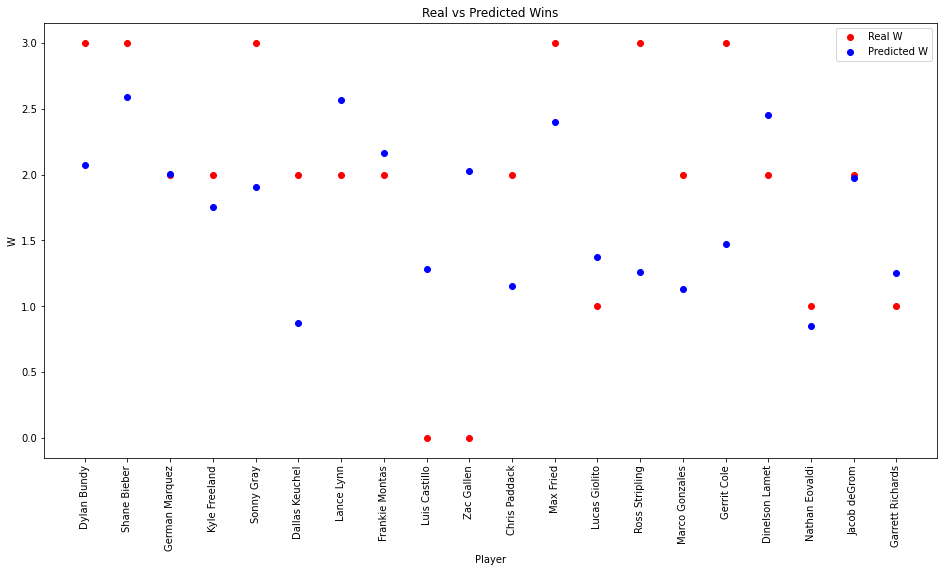

In [75]:
# Plot out real vs predicted
plt.figure(figsize=(16,8))
plt.title('Real vs Predicted Wins')
plt.scatter(df_tested.index[:20], df_tested['Real W'][:20], color='r')
plt.scatter(df_tested.index[:20], df_tested['Predicted W'][:20], color='blue')
plt.ylabel('W')
plt.xlabel('Player')
plt.xticks(rotation=90)
plt.legend(['Real W', 'Predicted W'])